In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [9]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.tail()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,6.100319
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,4.983607
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,5.389072
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,3.091042
929187,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,15.0,2021-09-09 23:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,2.772589


In [18]:
target_columns = ["bike_count", "log_bike_count"]
numerical_columns = ['site_id', 'latitude', 'longitude']
categorical_columns = ['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']
date_columns = ['date', 'counter_installation_date']
all_columns = numerical_columns + categorical_columns + date_columns + target_columns

data_bike = data[all_columns]
# cosmetic changes

In [19]:
data_bike.head()

,site_id,latitude,longitude,counter_id,counter_name,site_name,coordinates,counter_technical_id,date,counter_installation_date,bike_count,log_bike_count
48321,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 02:00:00,2013-01-18,0.0,0.000000
48324,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 03:00:00,2013-01-18,1.0,0.693147
48327,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 04:00:00,2013-01-18,0.0,0.000000
48330,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 15:00:00,2013-01-18,4.0,1.609438
48333,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 18:00:00,2013-01-18,9.0,2.302585


In [20]:
data_bike.describe()

,site_id,latitude,longitude,date,counter_installation_date,bike_count,log_bike_count
count,4.968270e+05,496827.000000,496827.000000,496827,496827,496827.000000,496827.000000
mean,1.053450e+08,48.854343,2.345479,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,60.191475,3.079917
min,1.000070e+08,48.826360,2.265420,2020-09-01 01:00:00,2013-01-18 00:00:00,0.000000,0.000000
25%,1.000475e+08,48.840801,2.314440,2020-12-05 22:00:00,2018-11-29 00:00:00,5.000000,1.791759
50%,1.000562e+08,48.852090,2.353870,2021-03-08 11:00:00,2019-11-06 00:00:00,29.000000,3.401197
75%,1.000563e+08,48.864610,2.375870,2021-06-09 14:00:00,2019-12-11 00:00:00,79.000000,4.382027
max,3.000147e+08,48.891720,2.409690,2021-09-09 23:00:00,2020-11-29 00:00:00,1302.000000,7.172425
std,3.210346e+07,0.018554,0.038026,NaN,NaN,87.590566,1.659899


In [21]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   site_id                    496827 non-null  int64         
 1   latitude                   496827 non-null  float64       
 2   longitude                  496827 non-null  float64       
 3   counter_id                 496827 non-null  category      
 4   counter_name               496827 non-null  category      
 5   site_name                  496827 non-null  category      
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   date                       496827 non-null  datetime64[us]
 9   counter_installation_date  496827 non-null  datetime64[us]
 10  bike_count                 496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [22]:
data_bike.nunique(axis = 0)

site_id                        30
latitude                       30
longitude                      30
counter_id                     56
counter_name                   56
site_name                      30
coordinates                    30
counter_technical_id           30
date                         8974
counter_installation_date      22
bike_count                    998
log_bike_count                998
dtype: int64

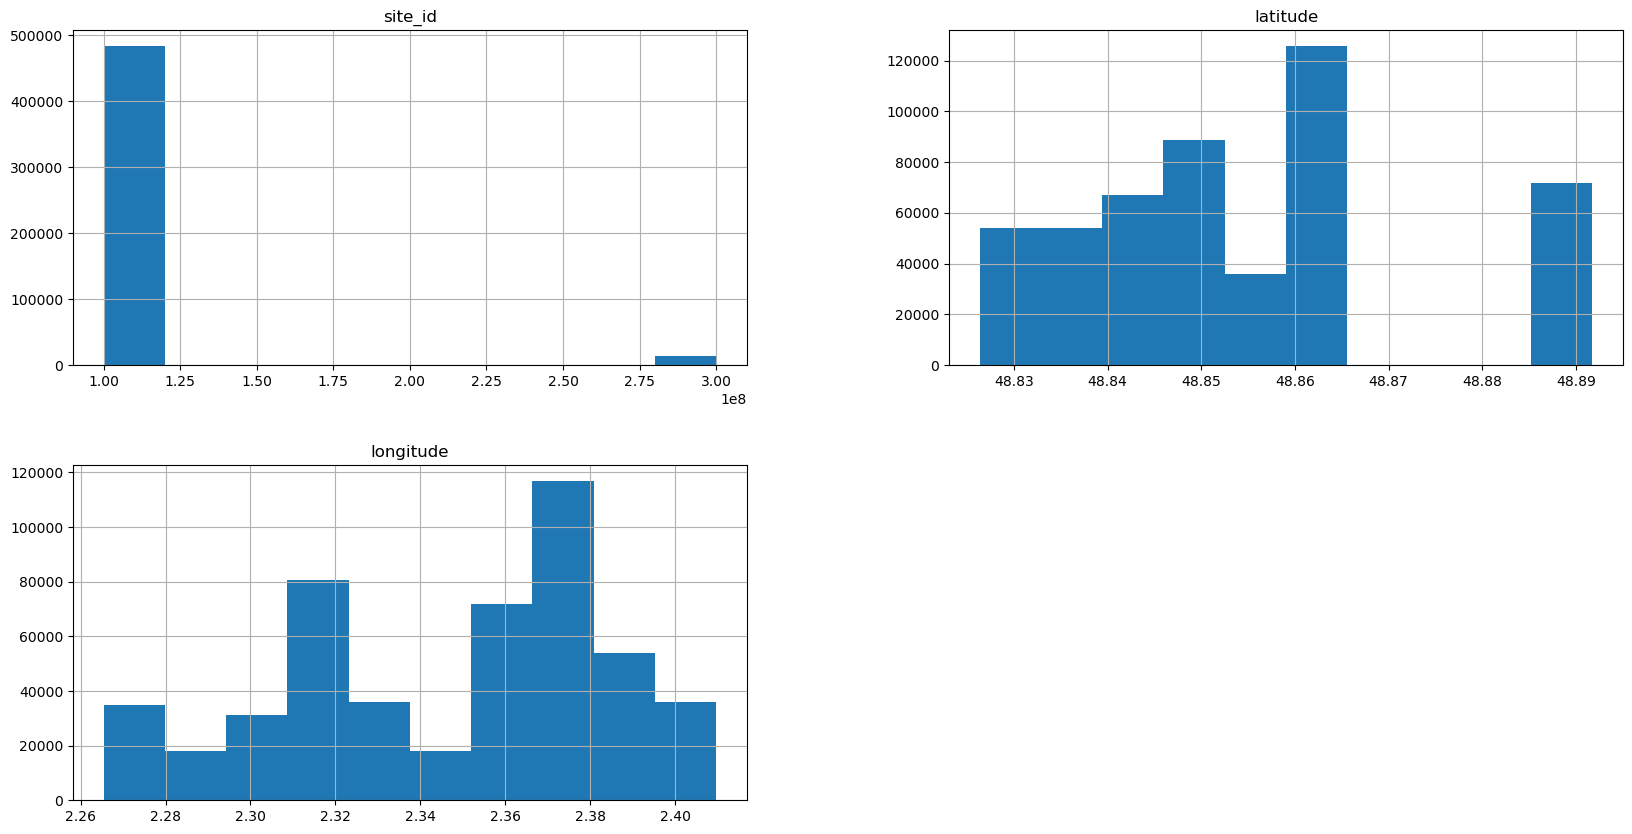

In [23]:
data_bike[numerical_columns].hist(figsize=(20, 10));

We can already make a few comments about some of the variables:
* site_id: we notice that the site_id has a really low impact, most of them coming from the same site, might be a typo or some sort of mistake as according to nunique there is more than 2 sites used. We might have to solve this issue
* date: we do notice a few peaks, hard to identify where do they come from for now
* latitude and longitude : actually go together under coordinates, kind of repetitive but will still enable to be more precise in the predictions